In [1]:
%pylab inline
import pandas as pd
import mdtraj as md
import matplotlib.animation as animation
from scipy import interpolate
from mpl_toolkits.mplot3d import Axes3D

Populating the interactive namespace from numpy and matplotlib


# RMSD

In [2]:
top_bound = md.load('data/liganded.pdb')
top_unbound = md.load('data/unboundgp120.pdb')

In [3]:
traj_iter = md.iterload('data/pro.xtc', top=top_unbound,chunk=100)
traj = traj_iter.next()
for i in range(1,450):
    traj += traj_iter.next()

In [9]:
traj

<mdtraj.Trajectory with 45000 frames, 3637 atoms, 462 residues, and unitcells at 0xde11f28>

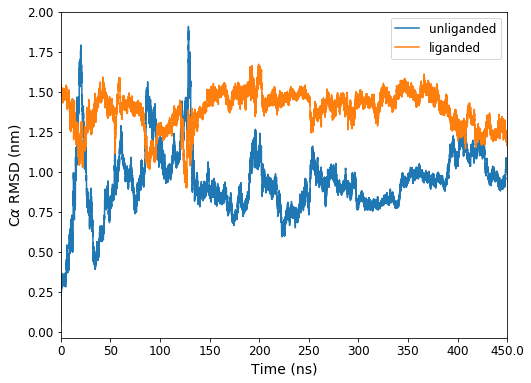

In [11]:
# rmsd_to_unliganded = md.rmsd(traj, top_unbound, atom_indices=top_unbound.topology.select('backbone'),parallel=True)
# rmsd_to_liganded = md.rmsd(traj, top_bound, atom_indices=top_bound.topology.select('backbone'),parallel=True)
figure(figsize=(8,6))
plot(rmsd_to_unliganded, label='unliganded')
plot(rmsd_to_liganded,  label='liganded')
xlabel('Time (ns)',fontsize=14)
xticks(range(0,len(traj)+1,5000)[:-1]+[len(traj)],range(0,len(traj)/100+1,50)[:-1]+[round(len(traj)/100.0,5)],fontsize=12)
# xticks(range(0,len(traj),5000)[:-1]+[len(traj)],range(0,len(traj)/100+1,50)[:-1]+[round(len(traj)/100.0,5)],fontsize=12)
ylabel(r'C$\alpha$ RMSD (nm)',fontsize=14)
yticks(fontsize=12)
xlim(0,len(traj))
legend(fontsize=12)
savefig('RMSD.png',dpi=720,bbox_inches='tight')

# HILLS

In [2]:
hills = pd.read_csv('data/HILLS', sep=r'\s*', header=None, comment='#')[:450000]

D:\ProgramData\Anaconda3\envs\python27\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


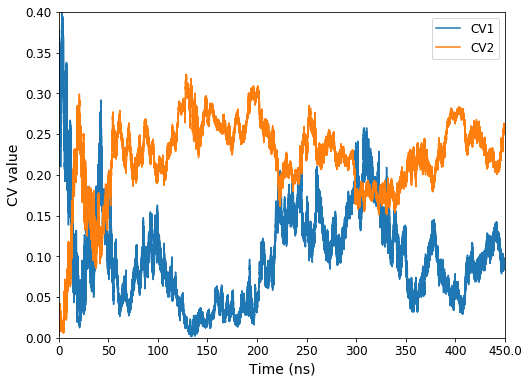

In [4]:
figure(figsize=(8,6))
d1 = [i/374 for i in hills[1]]# 219/176
d2 = [i/374 for i in hills[2]]
plot(hills[0],d1,label='CV1')
plot(hills[0],d2,label='CV2')

xlabel('Time (ns)',fontsize=14)
ylabel('CV value',fontsize=14)
xticks(range(0,len(hills[0])+1,50000)[:-1]+[len(hills[0])],range(0,len(hills[0])/1000+1,50)[:-1]+[round(len(hills[0])/1000.0,5)],fontsize=12)
xlim(0,len(hills[0]))
yticks(fontsize=12)
ylim(0,max(max(d2),max(d1)))
legend(fontsize=12)
savefig('cv_value.png',dpi=720,bbox_inches='tight')

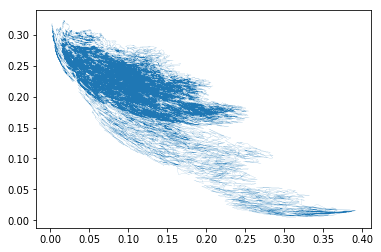

In [32]:
plot(d1[::10],d2[::10],lw=0.1)

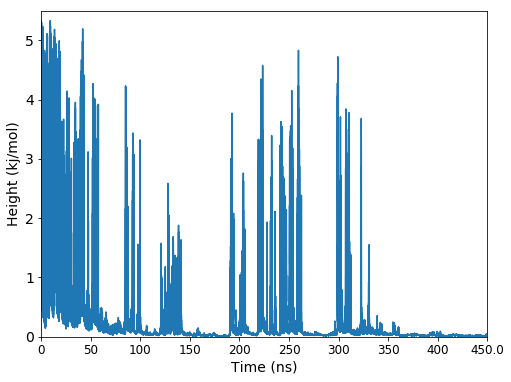

In [58]:
figure(figsize=(8,6))
plot(hills[0],hills[5])
xlabel('Time (ns)',fontsize=14)
xticks(range(0,len(hills[0])+1,50000)[:-1]+[len(hills[0])],range(0,len(hills[0])/1000+1,50)[:-1]+[round(len(hills[0])/1000.0,5)],fontsize=12)
ylabel('Height (kj/mol)',fontsize=14)
yticks(fontsize=14)
xlim(0,len(hills[0]))
ylim(0,5.5)
savefig('guss_height.png',dpi=720,bbox_inches='tight')

# distance of b2-b21 and b3-b21

D:\ProgramData\Anaconda3\envs\python27\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.
  


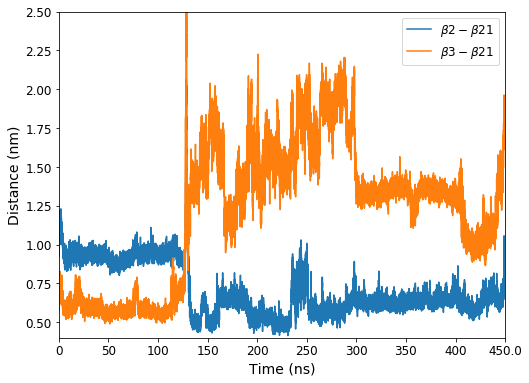

In [64]:
figure(figsize=(8,6))
data = pd.read_csv('data/b-sheet_distance', sep=r'\s*', header=None, comment='#')[:45000]
plot(data[0],data[1],label='$\\beta2-\\beta21$')
plot(data[0],data[2],label='$\\beta3-\\beta21$')
ylabel('Distance (nm)',fontsize=14)
xlabel('Time (ns)',fontsize=14)

xticks(range(0,len(data[0])+1,5000)[:-1]+[len(data[0])],range(0,len(data[0])/100+1,50)[:-1]+[round(len(data[0])/100.0,5)],fontsize=12)
yticks(fontsize=12)
xlim(0,45000)
ylim(0.4,2.5)
legend(fontsize=12)
savefig('b-sheet_distance.png',dpi=720,bbox_inches='tight')

# monitor convergence

D:\ProgramData\Anaconda3\envs\python27\lib\site-packages\ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.
  


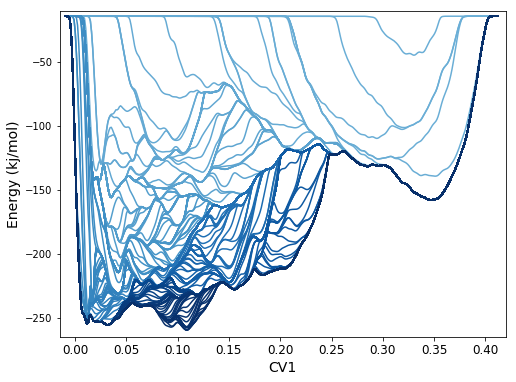

In [5]:
# 1d FEL
figure(figsize=(8,6))
fes_files = 4500
colors = cm.Blues(np.linspace(0.5, 1, fes_files))
for i in range(0,fes_files,10):
    fes = pd.read_csv('data/fes_2li/fes_'+str(i)+'.dat', sep=r'\s*', header=None, comment='#')
    plot(fes[0]/374, fes[1], color=colors[i])
xlabel('CV1',fontsize=14)
ylabel('Energy (kj/mol)',fontsize=14)
xticks(fontsize=12)
xticks(fontsize=12)
xlim(-0.015,0.42)
ylim(-265,-10)
savefig('cm2unli_1D_energy.png',dpi=720,bbox_inches='tight')

In [65]:
%%bash
# number of free-energy profiles
nfes=3460
# minimum of basin A
minA=3
# maximum of basin A
maxA=20
# minimum of basin B
minB=110
# maximum of basin B
maxB=140
# temperature in energy units
kbt=2.5
cd /home/denglei/gp120/cmap/cmap_0710/cm2unli_fes/
for((i=0;i<nfes;i++))
do
 # calculate free-energy of basin A
 A=`awk 'BEGIN{tot=0.0}{if($1!="#!" && $1>min && $1<max)tot+=exp(-$2/kbt)}END{print -kbt*log(tot)}' min=${minA} max=${maxA} kbt=${kbt} fes_${i}.dat`
 # and basin B
 B=`awk 'BEGIN{tot=0.0}{if($1!="#!" && $1>min && $1<max)tot+=exp(-$2/kbt)}END{print -kbt*log(tot)}' min=${minB} max=${maxB} kbt=${kbt} fes_${i}.dat`
 # calculate difference
 Delta=$(echo "${A} - ${B}" | bc -l)
 # print it
 echo $i $Delta >> convergence.dat
done

Couldn't find program: u'bash'


D:\ProgramData\Anaconda3\envs\python27\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.
  


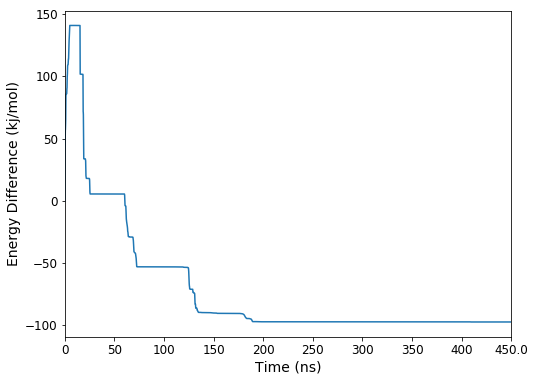

In [28]:
figure(figsize=(8,6))
convergence = pd.read_csv('data/convergence.dat', sep=r'\s*', header=None, comment='#')
plot(convergence[1])
xticks(range(0,len(convergence[0])+1,500)[:-1]+[len(convergence[0])],
       range(0,len(convergence[0])/10+1,50)[:-1]+[round(len(convergence[0])/10,5)],fontsize=12)
yticks(fontsize=12)
xlabel('Time (ns)',fontsize=14)
ylabel('Energy Difference (kj/mol)',fontsize=14)
xlim(0,4500)
savefig('energy_difference.png',dpi=720,bbox_inches='tight')

# FEL

In [2]:
def interpolate_EFL(x,y,z,npoint=None,kind='cubic'):
    from scipy import interpolate
    if npoint==None:
        npoint = len(x)*20
    newfunc = interpolate.interp2d(x, y, z, kind=kind)
    xmin = np.min(x)
    xmax = np.max(x)
    ymin = np.min(y)
    ymax = np.max(y)

    xnew = np.linspace(xmin,xmax,npoint)
    ynew = np.linspace(ymin,ymax,npoint)
    
    znew = newfunc(xnew, ynew)
    return (xnew,ynew,znew)   

In [4]:
hills.iloc[[396930]][[1,2]]/374

1         2
396930  0.041604  0.274637

D:\ProgramData\Anaconda3\envs\python27\lib\site-packages\ipykernel_launcher.py:2: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.

D:\ProgramData\Anaconda3\envs\python27\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning:

The griddata function was deprecated in version 2.2. Use scipy.interpolate.griddata instead.



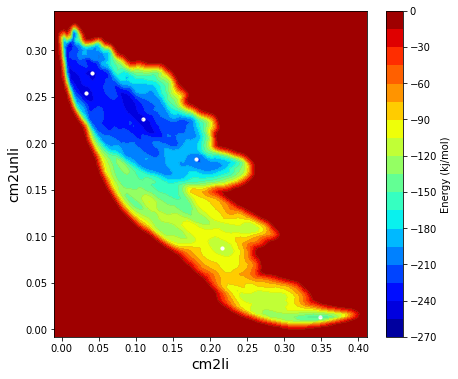

In [129]:
figure(figsize=(7,6))
fes = pd.read_csv('data/fes2D/fes_4500.dat', sep=r'\s*', header=None, comment='#')
fes[0] = fes[0]/374
fes[1] = fes[1]/374

xi = np.linspace(fes[0].min(), fes[0].max(), 100)
yi = np.linspace(fes[1].min(), fes[1].max(), 100)
zi = griddata(fes[0], fes[1], fes[2], xi, yi, interp='linear')
#x,y,z = interpolate_EFL(xi,yi,zi,npoint=1000)

colors = [(cm.jet(i)) for i in xrange(40,250)]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('new_map', colors, N=300)

#extent = [yedge[0], yedge[-1], xedge[0], xedge[-1]]
contour(xi,yi,zi, 20, linewidths = 0.1)
contourf(xi,yi,zi, 20,cmap=cm.jet)
clb = colorbar()
xlabel('cm2li',fontsize=14)
ylabel('cm2unli',fontsize=14)
clb.set_label('Energy (kj/mol)')
scatter(np.array(minimal_point).T[0],np.array(minimal_point).T[1],s=10,color='white')
#savefig('free_energy_1D.png',dpi=720,bbox_inches='tight')

In [26]:
a = [np.random.randint(1000) for i in range(100)]

In [100]:
def find_nearest_point(seq,point,num=1):
    distance = np.abs(np.linalg.norm(seq-point,axis=1))
    sort_index = np.argsort(distance)
    return sort_index[:num]

In [74]:
def find_nearest_point_(seq,point):
    distance = np.abs(seq-point)
    return np.where(distance==np.min(distance))[0]

In [95]:
def find_minimal(region,marix,x,y):
    #region = [([x1,x1_],[y1,y1_]),([x2,x2_],[y2,y2_]),()...]
    minimal_point = []
    for xi_,yi_ in region:
        x_index = [find_nearest_point_(x,[xi_[0]])[0],find_nearest_point_(x,[xi_[1]])[0]]
        x_index = [np.min(x_index),np.max(x_index)]
        y_index = [find_nearest_point_(y,yi_[0])[0],find_nearest_point_(y,yi_[1])[0]]
        y_index = [np.min(y_index),np.max(y_index)]
        
        posi = np.where(marix == np.min(marix[y_index[0]:y_index[1],x_index[0]:x_index[1]]))
        minimal_point.append([x[posi[1][0]],y[posi[0][0]]])
    return minimal_point

In [128]:
region = [([0.3,0.4],[0,0.05]),([0.195,0.24],[0.075,0.10]),([0.16,0.20],[0.15,0.20]),([0.06,0.13],[0.20,0.25]),([0.03,0.05],[0.265,0.28]),([0,0.05],[0.25,0.3])]
minimal_point = find_minimal(region,zi,xi,yi)

In [122]:
minimal_point

[[0.34779042699724516, 0.013063329282126074],
 [0.18170756927564413, 0.18310343947496355],
 [0.10931247744827959, 0.22561346702317292],
 [0.041175920434289415, 0.27520849916275048],
 [0.032658850807540649, 0.25395348538864582]]

In [130]:
for point in minimal_point:
    print find_nearest_point(hills[[1,2]][::10]/374,point,5)

[384 330 336 373 328]
[1087 1242 1101 1244 1098]
[23654 23653 31873 31836 31853]
[43351 43435  9628 43388  9189]
[39735 40612 40613 40828 39693]
[16926 17120  7115  7112 16760]


In [ ]:
43351 43435  9628 43388  9189 39735 40612 40613 40828 39693 16926 17120  7115  7112 16760

In [10]:
import plotly
import plotly.graph_objs as go
import plotly.tools as tls
plotly.offline.init_notebook_mode()

In [11]:
def matplotlib_to_plotly(cmap, pl_entries):
    h = 1.0/(pl_entries-1)
    pl_colorscale = []

    for k in range(pl_entries):
        C = map(np.uint8, np.array(cmap(k*h)[:3])*255)
        pl_colorscale.append([k*h, 'rgb'+str((C[0], C[1], C[2]))])

    return pl_colorscale

In [13]:
# x_,y_,z_ = interpolate_EFL(xi,yi,zi,npoint=200)
# z_[z_>0] = 0
# x_,y_ = np.meshgrid(x_, y_)

colors = [(cm.jet(i)) for i in xrange(40,250)]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('new_map', colors, N=300)
cmap_new = matplotlib_to_plotly(cm.jet, 255)
data = [
    go.Surface(x=xi,y=yi,z=zi,
               colorscale=cmap_new,
               colorbar=go.surface.ColorBar(title='Free energy (KJ/mol)',titleside='right',titlefont={'size':17}),
               #lighting=dict(ambient=0.4, diffuse=0.5, roughness = 0.9, specular=0.6, fresnel=0.2),
               lightposition = dict(x=10,y=-10,z=-200)
               #contours=go.surface.Contours(z=go.surface.contours.Z(show=True,usecolormap=True,highlightcolor="#42f462",project=dict(z=True)))
    ),

    
]
layout = go.Layout(
    title='Energy landscape',
    titlefont={'size':19},
    autosize=True,
    width=1000,
    height=1000,
    scene={
        'xaxis':{'title': 'CV1','titlefont':{'size':17},'tickfont':{'size':15}},
        'yaxis':{'title': 'CV2','titlefont':{'size':17},'tickfont':{'size':15}},
        'zaxis':{'title': '','tickfont':{'size':15}},
        },
)
fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='FEL-3D')

In [5]:
x_,y_,z_ = interpolate_EFL(xi,yi,zi,npoint=2000)
z_[z_>0] = 0
x_,y_ = np.meshgrid(x_, y_)
colors = [('white')] + [(cm.jet(i)) for i in xrange(40,250)]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('new_map', colors, N=300)
znorm = z_ - z_.min()
znorm /= znorm.ptp()
#znorm.min(), znorm.max()
color = cmap(znorm)
ipv.figure(width=400, height=400)
ipv.plot_surface(x_,y_,z_, color=color)
#ipv.plot_wireframe(x_,y_,z_, color="red")
ipv.show()

ipv.ylim(np.min(y_),np.max(y_))
ipv.xlim(np.min(x_),np.max(x_))
ipv.zlim(np.min(z_)-20,0)
ipv.zlabel('Energy (kj/mol)',fontsize=12)
ipv.xlabel('CV1',fontsize=12)
ipv.ylabel('CV2',fontsize=12)

VkJveChjaGlsZHJlbj0oRmlndXJlKGNhbWVyYT1QZXJzcGVjdGl2ZUNhbWVyYShmb3Y9NDYuMCwgcG9zaXRpb249KDAuMCwgMC4wLCAyLjApLCBxdWF0ZXJuaW9uPSgwLjAsIDAuMCwgMC4wLCDigKY=


TypeError: zlabel() got an unexpected keyword argument 'fontsize'

In [3]:
pdb = 'data/unboundgp120.pdb'
traj_iter = md.iterload('data/pro.xtc',top=pdb,chunk=1000,)
traj = traj_iter.next()
for i in range(1,45):
    print i,
    traj += traj_iter.next()

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44


In [4]:
top = md.load(pdb)

In [6]:
from msmbuilder.featurizer import RawPositionsFeaturizer
from msmbuilder.decomposition import PCA

In [7]:
featurizer = RawPositionsFeaturizer(atom_indices=top.topology.select('name CA'))
feat = featurizer.fit_transform(traj)
pca = PCA()
pca_out = pca.fit_transform(feat)

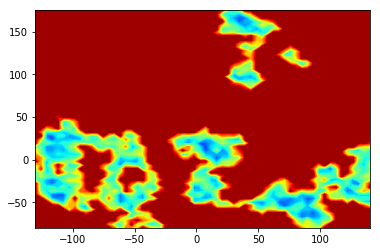

In [9]:
z,xedge, yedge = np.histogram2d(vstack(pca_out)[:,0], vstack(pca_out)[:,1], bins=60)
x = 0.5*(xedge[:-1] + xedge[1:])
y = 0.5*(yedge[:-1] + yedge[1:])
zmin_nonzero = np.min(z[np.where(z > 0)])
z = np.maximum(z, zmin_nonzero)
F = -2.479*np.log(z)
F -= np.max(F)
F = np.minimum(F, 0)
colors = [(cm.jet(i)) for i in xrange(40,250)]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('new_map', colors, N=300)
extent = [yedge[0], yedge[-1], xedge[0], xedge[-1]]
contourf(x,y,F.T, 100, cmap=cmap, extent=extent,)#levels=[i for i in range(-15,0,1)]+[0]

# WHAM

In [29]:
colvar = pd.read_csv('COLVAR', sep=r'\s*', header=None, comment='#')
cv1 = colvar[1]/374
cv2 = colvar[2]/374
bias = colvar[3]

D:\ProgramData\Anaconda3\envs\python27\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [30]:
def get_wham_weights(nbias, nframes, bias_ts, nwham=1000, thres=1.0e-10,KBT_=2.5):
    # find minimum bias
    min_bias = min(bias_ts)
    # initialize weights
    w = []
    for i in range(0, nframes): w.append(1.0)
    # offset and exponential of the bias
    expv = []
    for i in range(0, len(bias_ts)): expv.append(math.exp((-bias_ts[i]+min_bias)/KBT_))
    # initialize Z 
    Z = []
    for j in range(0, nbias): Z.append(1.0)
    # WHAM iterations
    for iii in range(0, nwham):
        # store Z
        Z_old = Z[:]
        # recompute weights
        norm = 0.0
        for i in range(0, len(w)):
            ew = 0.0
            for j in range(0, len(Z)): ew += expv[i*len(Z)+j] / Z[j]
            w[i] = 1.0 / ew
            norm += w[i]
        # normalize weights
        for i in range(0, len(w)): w[i] /= norm
        # recompute Z
        for j in range(0, len(Z)): Z[j] = 0.0
        for i in range(0, len(w)):
            for j in range(0, len(Z)): Z[j] += w[i]*expv[i*len(Z)+j]
        # normalize Z 
        norm = sum(Z)
        for j in range(0, len(Z)): Z[j] /= norm
        # compute change in Z
        eps = 0.0
        for j in range(0, len(Z)): 
            d = math.log(Z[j]/Z_old[j])
            eps += d*d
        # check convergence
        if(eps<thres): break
    # return weights
    return w

In [4]:
w = np.array(get_wham_weights(1,len(bias),bias))

In [5]:
fes = pd.DataFrame([cv1,cv2,w]).T
fes.columns = ['cv1','cv2','weight']

In [6]:
z,xedge,yedge = np.histogram2d(cv1,cv2,bins=60)
print z.shape,xedge.shape,yedge.shape
z = []
for i in range(len(xedge)-1):
    z_ = []
    fes_ = fes[(fes['cv1']>=xedge[i]) & (fes['cv1']<xedge[i+1])]
    for j in range(len(yedge)-1):
        weight_ = fes_['weight'][(fes_['cv2'] >= yedge[j]) & (fes_['cv2'] <= yedge[j+1])]
        z_.append(sum(weight_))
    z.append(z_)
z = np.array(z)
x = 0.5*(xedge[:-1] + xedge[1:])
y = 0.5*(yedge[:-1] + yedge[1:])
print z.shape,x.shape,y.shape

(60, 60) (61,) (61,)
(60, 60) (60,) (60,)


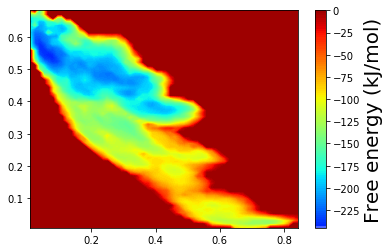

In [7]:
colors = [('white')] + [(cm.jet(i)) for i in xrange(40,250)]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('new_map', colors, N=300)
#cmap = cm.colors.LinearSegmentedColormap.from_list('new_map',[cm.nipy_spectral(i) for i in range(0,256,1)]+[('white')],2560)
#cmap = cm.colors.LinearSegmentedColormap.from_list('new_map',[(cm.spectral(i)) for i in range(0,256,1)]+[('white')],256)
zmin_nonzero = np.min(z[np.where(z > 0)])
z = np.maximum(z, zmin_nonzero)
F = -2.479*np.log(z)
F -= np.max(F)
F = np.minimum(F, 0)
extent = [yedge[0], yedge[-1], xedge[0], xedge[-1]]
contourf(x,y,F.T, 100, cmap=cmap, extent=extent)
clb = colorbar()
#clb.set_ticks(range(0,-17,-2))
clb.set_label('Free energy (kJ/mol)',fontsize=20)
#xlim(-25,20)
#ylim(-20,20)

In [8]:
from mpl_toolkits.mplot3d import Axes3D

In [10]:
x_.shape,y_.shape,z_.shape,F.shape

NameError: name 'x_' is not defined

In [14]:
x_,y_,z_ = interpolate_EFL(x,y,F,npoint=2000)
z_[z_>0] = 0
x_,y_ = np.meshgrid(x_, y_)
colors = [('white')] + [(cm.jet(i)) for i in xrange(40,250)]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('new_map', colors, N=300)
znorm = z_ - z_.min()
znorm /= znorm.ptp()
#znorm.min(), znorm.max()
color = cmap(znorm)
ipv.figure(width=400, height=400)
ipv.plot_surface(x_,y_,z_, color=color)
#ipv.plot_wireframe(x_,y_,z_, color="red")
ipv.show()
ipv.
ipv.ylim(0,0.7)
ipv.xlim(0,0.85)
ipv.zlim(-300,0)

VkJveChjaGlsZHJlbj0oRmlndXJlKGNhbWVyYT1QZXJzcGVjdGl2ZUNhbWVyYShmb3Y9NDUuMCwgcG9zaXRpb249KDAuMCwgMC4wLCAyLjApLCBxdWF0ZXJuaW9uPSgwLjAsIDAuMCwgMC4wLCDigKY=


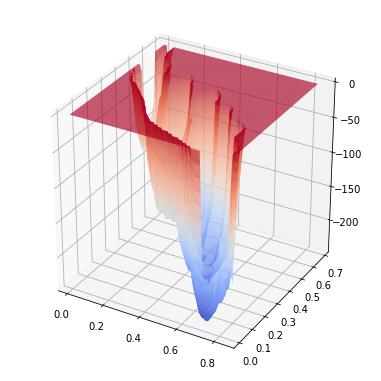

In [21]:
x_,y_,z_ = interpolate_EFL(x,y,F,npoint=1000,kind='linear')
x_,y_ = np.meshgrid(x_, y_)
fig = figure(figsize=(5,5))
ax = Axes3D(fig)
cmap = cm.colors.LinearSegmentedColormap.from_list('new_map',[cm.nipy_spectral(i) for i in range(0,256,1)]+[('white')],2560)
ax.plot_surface(x_, y_, z_,cmap=cm.coolwarm,rstride=2, cstride=2,)
#ax.view_init(75,35)
# ax.xaxis.pane.fill = False
# ax.yaxis.pane.fill = False
# ax.zaxis.pane.fill = False
# ax.grid(b=False)
#ax.plot_trisurf(cv1,cv2,w)

In [ ]:
figure(figsize=(8,8))
fes.hist(bins=50)

In [ ]:
fes_cm2li =  pd.read_csv('cm2lig_fes.dat', sep=r'\s*', header=None, comment='#')
fes_cm2unli =  pd.read_csv('cm2unli_fes.dat', sep=r'\s*', header=None, comment='#')

In [ ]:
subplot(121)
plot(fes_cm2li[0],fes_cm2li[1])
title('to_li')
subplot(122)
plot(fes_cm2unli[0],fes_cm2unli[1])
title('to_unli')

# energy

In [ ]:
fes_path = '../../gp120/cmap/cmap_0710/fes/'

In [ ]:
fes_files = 43
#fig,ax = subplots(figsize = (12,8))
fig = figure(figsize=(8,6))
colors = iter(cm.Blues(np.linspace(0.5, 1, fes_files)))
colors = [colors.next() for _ in range(fes_files)]
def animate(i):
    fig.clear()
    #ax.collections = []
    fes = pd.read_csv('../../gp120/cmap/cmap_0710/fes/fes_'+str(i)+'.dat', sep=r'\s*', header=None, comment='#')
    plot(fes[0]/176, fes[1], color=colors[i])
    xlabel('cm2li')
    ylabel('fes (kj/mol)')
    xlim(-0.02,0.5)
    ylim(-400,0)
plt.rcParams['animation.ffmpeg_path'] = '../../soft/ffmpeg/bin/ffmpeg'
FFwriter = animation.FFMpegWriter(fps=30,extra_args=['-vcodec', 'libx264'])
anim = animation.FuncAnimation(
    fig, animate, interval=3000, frames=42)

anim.save('fes_cm2li.gif', writer = FFwriter)   

In [ ]:
fes_files = 3454
colors = iter(cm.Blues(np.linspace(0.5, 1, fes_files)))
figure(figsize=(20,10))
#fes = pd.read_csv('fes/fes_'+str(1)+'.dat', sep=r'\s*', header=None, comment='#')
#plot(fes[0], fes[1]/176, color=next(colors))
for i in range(0,fes_files,5000):
    fes = pd.read_csv('/home/denglei/gp120/cmap/cmap_0710/cm2unli_fes/bck.1.fes_'+str(i)+'.dat', sep=r'\s*', header=None, comment='#')
    plot(fes[0], fes[2], color=next(colors))
    xlabel('cm2li')
    ylabel('fes (kj/mol)')


In [ ]:
fes_files = 43
colors = iter(cm.Blues(np.linspace(0.5, 1, fes_files)))
figure(figsize=(20,10))
# fes = pd.read_csv('fes/fes_'+str(40)+'.dat', sep=r'\s*', header=None, comment='#')
# plot(fes[0], fes[1]/176, color=next(colors))
for i in range(0,fes_files):
    fes = pd.read_csv('fes/fes_'+str(i)+'.dat', sep=r'\s*', header=None, comment='#')
    plot(fes[0]/176, fes[1], color=next(colors))
    xlabel('cm2unli')
    ylabel('fes (kj/mol)')

In [ ]:
fig = figure(figsize=(8,6))
def animate(i):
    #ax.collections = []
    fig.clear()
    fes = pd.read_csv(fes_path+'/fes_{}.dat'.format(i), sep=r'\s*', header=None, comment='#')
    fes[0] = fes[0]/176
    fes[1] = fes[1]/176
    xi = np.linspace(fes[0].min(), fes[0].max(), 100)
    yi = np.linspace(fes[1].min(), fes[1].max(), 100)
    zi = griddata(fes[0], fes[1], fes[2], xi, yi, interp='linear')
    contour(xi,yi,zi, 20, linewidths = 0.1, colors = 'k',animated=False)
    contourf(xi,yi,zi, 20,levels=range(-400,1,20),animated=False)
    clb = colorbar()
    xlabel('cm2li')
    ylabel('cm2unli')
    clb.set_label('fes (kj/mol)')
    
#rcParams['animation.ffmpeg_path'] = '../../soft/ffmpeg/bin/ffmpeg'
#FFwriter = animation.FFMpegWriter(fps=10,bitrate=2000,extra_args=['-vcodec', 'libx264'])
FFMpegWriter = animation.writers['ffmpeg']
metadata = dict(title='Movie Test', artist='Matplotlib',
            comment='Movie support!')
writer = FFMpegWriter(fps=15, metadata=metadata)
anim = animation.FuncAnimation(
    fig, animate,frames=range(0,21939,200))
anim.save('fes_test.mp4', writer = writer) 

In [ ]:
fes = pd.read_csv('E:/fes/fes_21938.dat', sep=r'\s*', header=None, comment='#')
figure(figsize=(6,6))
fes[0] = fes[0]/176
fes[1] = fes[1]/176
xi = np.linspace(fes[0].min(), fes[0].max(), 100)
yi = np.linspace(fes[1].min(), fes[1].max(), 100)
zi = griddata(fes[0], fes[1], fes[2], xi, yi, interp='linear')
contour(xi, yi, zi, 20, linewidths = 0.1, colors = 'k')
contourf(xi, yi, zi, 20,levels=range(-400,1,40))
#clb = colorbar()
#clb.set_label('fes (kj/mol)')
xlabel('cm2li')
ylabel('cm2unli')
#savefig(path+'fes_figs/fes_'+str(i)+'png')
